In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
edd = pd.read_csv("../results/edd.csv", index_col=0)
arl = pd.read_csv("../results/arl.csv", index_col=0)

In [3]:
rep = {
    "Uniform10000" : "Uniform",
    "Mixed10000" : "Mixed",
    "Laplace10000" : "Laplace",
    "NormalToMixed1536" : "Mixed",
    "NormalToLaplace1536" : "Laplace",
    "NormalToUnif1536" : "Unif"
}

In [4]:
edd = edd.replace(rep).sort_values("dataset")
arl = arl.replace(rep).sort_values("dataset")

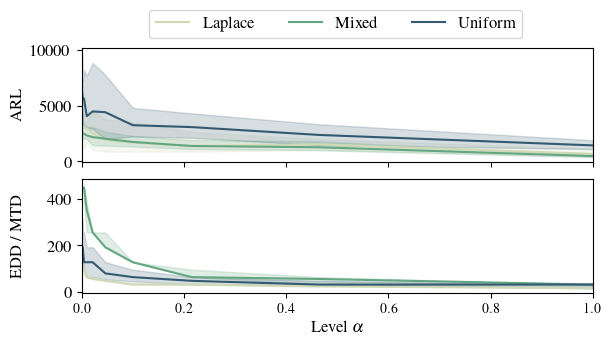

In [10]:
with sns.cubehelix_palette(4, start=0.5, rot=-0.75, gamma=1.2):
    fig, (ax11, ax12) = plt.subplots(2,1,sharey=False,sharex=True,figsize=(6,3),layout="constrained")
    sns.lineplot(data=arl, x="config", y="arl", hue="dataset", ax=ax11, estimator="median")
    sns.lineplot(data=edd, x="config", y="edd", hue="dataset", ax=ax12, estimator="median")

    ax12.set_xlim((0,1))
    ax11.set_ylabel("ARL", fontsize=12)
    ax12.set_ylabel("EDD / MTD", fontsize=12)
    ax12.set_xlabel("Level $\\alpha$", fontsize=12)

    fig.align_ylabels()

    Line, Label = ax11.get_legend_handles_labels()
    ax11.get_legend().remove()
    ax12.get_legend().remove()

    fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.55, 1.13), ncol=3)
    plt.savefig("../../mmdew-article/fig/edd+arl_0pad.pdf", bbox_inches="tight", pad_inches=0)